## My Cat x Dog Classifier

This project consists of building a Convolutional Neuron Network in order to correctly classify images containing cats and the ones with dogs.

### 1 - Importing useful libraries

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

### 2 - Loading image files

At the very first step, it is necessary to import the data from our folder. The important detail here is to keep the data divided by folders according to **train** and **test** data. Moreover, in each folder we need to split the data into folders that represent the categories - that is, we need to have a **CAT** and a **DOG** folder.

This process is useful especially because we have too much data to read all at once in the memory.

In [3]:
img_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2,
                             rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

This is going to help providing more images and keep the neural network **more robust** to just general images, since we are modifying the images a little bit by applying some transformations, such as rotation, zoom and flipping.

So it is time to pass our file directory to this generator object.

It is important to know that images have different shapes. Therefore, we need to define a target size/shape in order to properly process the images before training and testing our neural network.

In [31]:
shape = (150, 150, 3)
batch_size = 32

train_data = img_gen.flow_from_directory('./DATA/CATS_DOGS/train/', target_size=shape[:2],
                                         batch_size=batch_size, class_mode='binary')

Found 18743 images belonging to 2 classes.


In [32]:
test_data = img_gen.flow_from_directory('./DATA/CATS_DOGS/test/', target_size=shape[:2],
                                         batch_size=batch_size, class_mode='binary')

Found 6251 images belonging to 2 classes.


We can check to see our images.

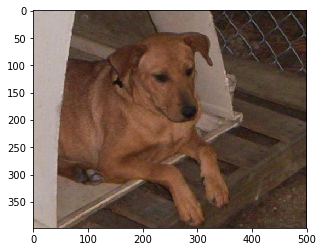

In [27]:
dog = cv2.imread('./DATA/CATS_DOGS/train/DOG/100.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog);

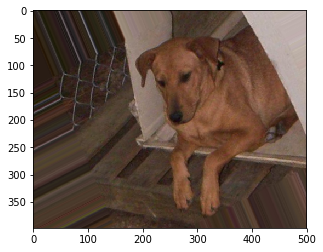

In [28]:
plt.imshow(img_gen.random_transform(dog));

Then, we can also check our classes.

In [29]:
train_data.labels

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
train_data.class_indices

{'CAT': 0, 'DOG': 1}

### 3 - Building a Neural Network

Since we are dealing with a huge amount of images, we will build a CNN - Convolutional Neural Network - in order to first extract the features of each image and then process this information to classify the image accordingly to the labels.

Flatten is necessary to turn our images into an array that dense neurons can process.

Dropouts help reduce overfitting by randomly turning neurons off during training. Here we will use 50% dropout.

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)             0         
__________

In [40]:
results = model.fit_generator(train_data,epochs=50,
                              steps_per_epoch=train_data.samples//batch_size,
                              validation_data=test_data,
                              validation_steps=test_data.samples//batch_size)

Epoch 1/50
585/585 [==============================] - 927s 2s/step - loss: 0.6662 - acc: 0.5919 - val_loss: 0.6477 - val_acc: 0.6326
Epoch 2/50
585/585 [==============================] - 594s 1s/step - loss: 0.6281 - acc: 0.6536 - val_loss: 0.5817 - val_acc: 0.6927
Epoch 3/50
585/585 [==============================] - 614s 1s/step - loss: 0.5929 - acc: 0.6860 - val_loss: 0.5316 - val_acc: 0.7283
Epoch 4/50
585/585 [==============================] - 635s 1s/step - loss: 0.5605 - acc: 0.7165 - val_loss: 0.5797 - val_acc: 0.6890
Epoch 5/50
585/585 [==============================] - 648s 1s/step - loss: 0.5377 - acc: 0.7358 - val_loss: 0.5277 - val_acc: 0.7323
Epoch 6/50
585/585 [==============================] - 611s 1s/step - loss: 0.5246 - acc: 0.7422 - val_loss: 0.4897 - val_acc: 0.7712
Epoch 7/50
585/585 [==============================] - 976s 2s/step - loss: 0.5126 - acc: 0.7546 - val_loss: 0.4929 - val_acc: 0.7646
Epoch 8/50
585/585 [==============================] - 841s 1s/step - 

In [41]:
model.save('nn_cat_dog.h5')

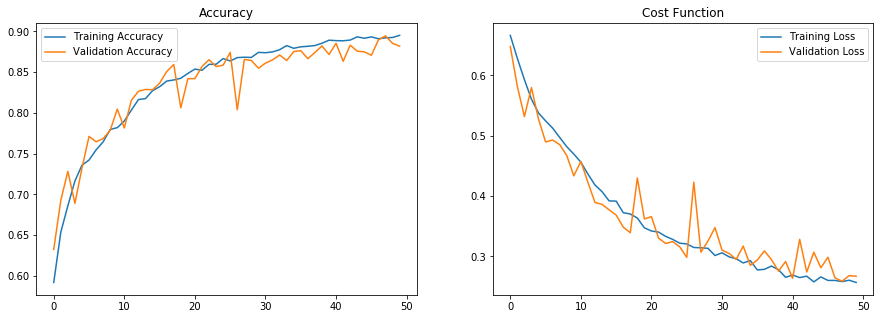

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.set_title('Accuracy')
ax1.plot(results.history['acc'], label='Training Accuracy');
ax1.plot(results.history['val_acc'], label='Validation Accuracy');
ax1.legend();

ax2.set_title('Cost Function')
ax2.plot(results.history['loss'], label='Training Loss');
ax2.plot(results.history['val_loss'], label='Validation Loss');
ax2.legend();

### 4 - Evaluating the model

Since we have now a trained neural network, we can obtain classification metrics for our current problem.

In [139]:
def metrics(y, y_pred):
    
    print('--> Confusion Matrix:')
    confusion = pd.DataFrame(confusion_matrix(y, y_pred))
    confusion.index = ['True Negative', 'True Positive']
    confusion.columns = ['Predicted Negative', 'Predicted Positive']
    display(confusion)
    
    print('\n--> Classification Report\n')
    print(classification_report(y, y_pred, digits=3))
    
def roc_auc_curve_proba(model_name, y, y_pred):
    
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    lw = 2
    ax1.plot(fpr, tpr, color='darkorange',
             lw=lw, label= model_name + ' (AUC = %0.3f)' % roc_auc)
    ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.0])
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.set_title('ROC Curve')
    ax1.legend(loc="lower right", fontsize=12)
    
    precision, recall, _ = precision_recall_curve(y, y_pred) 
    
    ax2.plot(recall, precision, color='darkorange',
             lw=lw, label= model_name)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.0])
    ax2.set_xlabel('Recall', fontsize=12)
    ax2.set_ylabel('Precision', fontsize=12)
    ax2.set_title('Precision-Recall Curve')
    ax2.legend(loc="lower left", fontsize=12)
    plt.show()

In [155]:
test_images = img_gen.flow_from_directory('./DATA/CATS_DOGS/test/', target_size=shape[:2],
                                         batch_size=batch_size, class_mode='binary', shuffle=False)
y_pred = model.predict_generator(test_images, steps=test_images.samples//batch_size+1)

Found 6251 images belonging to 2 classes.


In [162]:
metrics(test_data.classes, (y_pred>0.5).astype(int))

--> Confusion Matrix:


,Predicted Negative,Predicted Positive
True Negative,2804,322
True Positive,388,2737



--> Classification Report

              precision    recall  f1-score   support

           0      0.878     0.897     0.888      3126
           1      0.895     0.876     0.885      3125

    accuracy                          0.886      6251
   macro avg      0.887     0.886     0.886      6251
weighted avg      0.887     0.886     0.886      6251



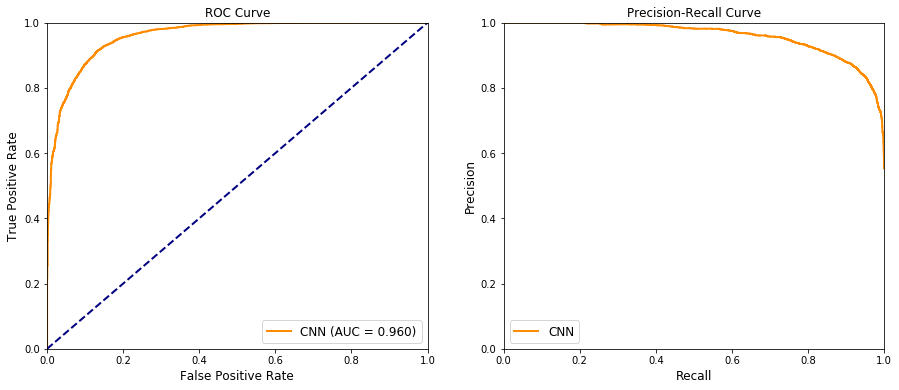

In [163]:
roc_auc_curve_proba('CNN', test_data.classes, y_pred)

### 5 - Testing the model on random images

Now we can select random images of cats and dogs in order to check if the model is suitable for the task.

+ Dog:

The image below shows a DOG



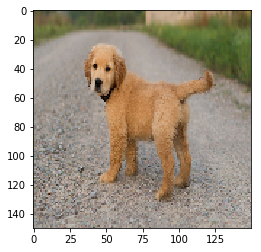

In [183]:
dog = image.load_img('./DATA/CATS_DOGS/dog_random.jpg', target_size=shape[:2])
plt.imshow(dog)
dog = image.img_to_array(dog)
dog = np.expand_dims(dog, axis=0)

labels = {value:key for key, value in test_data.class_indices.items()}
print(f'The image below shows a {labels[model.predict_classes(dog)[0][0]]}\n')

+ Cat:

The image below shows a CAT



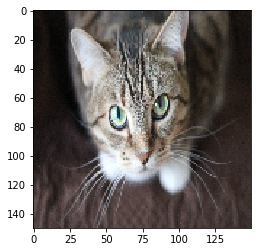

In [189]:
cat = image.load_img('./DATA/CATS_DOGS/cat_random.jpg', target_size=shape[:2])
plt.imshow(cat)
cat = image.img_to_array(cat)
cat = np.expand_dims(cat, axis=0)

labels = {value:key for key, value in test_data.class_indices.items()}
print(f'The image below shows a {labels[model.predict_classes(cat)[0][0]]}\n')